# Testing with unvectorized model_estimation

In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 19:12:03 2022

@author: soominkwon
"""

import numpy as np
import matplotlib.pyplot as plt

from utils import generate_models, compute_autocovariance, generate_mixed_lds, compute_separation
from classification import classification
from subspace_est import subspace_estimation
from clustering import clustering_fast
from model_estimation import model_estimation
from helpers import get_clusters, model_errors
import time

# initializing parameters
d   = 30
K   = 4
rho = 0.5

Msubspace        = 30  * d
Mclustering      = 10 * d
Mclassification  = 50 * d
M = Msubspace + Mclustering + Mclassification

Tsubspace        = 20
Tclustering      = 20
Tclassification  = 5

Trial Number: 0
Synthetic Data Generated
Coarse Subspace Estimated
Coarse Labels Clustered
[[1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [2]
 [2]
 [3]
 [2]
 [3]
 [1]
 [2]
 [3]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [2]
 [0]
 [3]
 [3]
 [1]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [3]
 [3]
 [3]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [3]
 [3]
 [2]
 [3]
 [2]
 [0]
 [0]
 [3]
 [1]
 [3]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [3]
 [3]
 [0]
 [3]
 [1]
 [0]
 [0]
 [1]
 [3]
 [1]
 [3]
 [3]
 [0]
 [3]
 [2]
 [0]
 [2]
 [3]
 [1]
 [2]
 [3]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [3]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [3]
 [3]
 [0]
 [2]
 [2]
 [3]
 [1]
 [0]
 [0]
 [0]
 [3]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [3]
 [3]
 [2]
 [2]
 [0]
 [0]
 [3]
 [1]
 [2]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [2]
 [2]
 [1]
 [1]
 [3]
 [2]
 [2]
 [1]
 [2]
 [1]
 [3]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]

Refined A Error:  1.247697167385788
Refined W Error:  4.174196102812623
Block Iteration:  4
Refined A Error:  1.2315210169422848
Refined W Error:  4.191626312639499
Block Iteration:  5
Refined A Error:  1.2213973300115857
Refined W Error:  4.161386133190936
Block Iteration:  6
Refined A Error:  1.215818005546242
Refined W Error:  4.142386525445145
Block Iteration:  7
Refined A Error:  1.2200270909819424
Refined W Error:  4.09873864224033
Block Iteration:  8
Refined A Error:  1.2000363207048041
Refined W Error:  4.074322752769304
Block Iteration:  9
Refined A Error:  1.1980665980023881
Refined W Error:  4.103165579484519
Block Iteration:  10
Refined A Error:  1.1849457121477658
Refined W Error:  4.085946912805609
Block Iteration:  11
Refined A Error:  1.178891213740474
Refined W Error:  4.014649617319848
Block Iteration:  12
Refined A Error:  1.1829398760775924
Refined W Error:  4.005879171369869
Block Iteration:  13
Refined A Error:  1.1768793070479857
Refined W Error:  3.9543238920429

Refined A Error:  1.1378818374264736
Refined W Error:  4.740396700844755
Block Iteration:  1
Refined A Error:  1.133889700558011
Refined W Error:  4.725988763105545
Block Iteration:  2
Refined A Error:  1.140370930290977
Refined W Error:  4.7197900607774885
Block Iteration:  3
Refined A Error:  1.1424612044226894
Refined W Error:  4.704643959084382
Block Iteration:  4
Refined A Error:  1.1419543977727968
Refined W Error:  4.730180905048158
Block Iteration:  5
Refined A Error:  1.1315756492210267
Refined W Error:  4.710200960078584
Block Iteration:  6
Refined A Error:  1.113484864154991
Refined W Error:  4.654524734019968
Block Iteration:  7
Refined A Error:  1.117346456149541
Refined W Error:  4.6171730206972725
Block Iteration:  8
Refined A Error:  1.1132768536179054
Refined W Error:  4.62265606343923
Block Iteration:  9
Refined A Error:  1.1044658085248968
Refined W Error:  4.664182753380092
Block Iteration:  10
Refined A Error:  1.1026594678418982
Refined W Error:  4.626616128274405

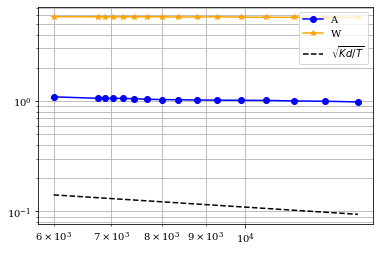

In [28]:
Ntrials = 6
block_num = 15

# initializing lists for errors
all_trials_A = np.zeros((Ntrials, block_num+1))
all_trials_W = np.zeros((Ntrials, block_num+1))

for trial in range(Ntrials):
    print('Trial Number:', trial)
    # generating labels and lengths of trajectories
    true_labels = np.random.randint(0, K, (M, 1))

    Ts = np.concatenate([np.ones((Msubspace, 1))*Tsubspace, np.ones((Mclustering,1))*Tclustering,
                         np.ones((Mclassification, 1))*Tclassification], axis=0)
    
    # generating synthetic data
    As, Whalfs = generate_models(d=d, K=K, rho=rho)

    # squaring Ws
    Ws = []
    for k in range(K):
        Ws.append(Whalfs[k]**2)
    
    # generating synthetic data
    Gammas, Ys = compute_autocovariance(As=As, Whalfs=Whalfs)
    delta_gy = compute_separation(Gammas=Gammas, Ys=Ys)
    data = generate_mixed_lds(As=As, Whalfs=Whalfs, true_labels=true_labels, Ts=Ts)
    
    data_subspace = data[:Msubspace]
    data_clustering = data[Msubspace:(Msubspace+Mclustering)]
    data_classification = data[(Msubspace+Mclustering):]

    print('Synthetic Data Generated')
    
    # coarse subspace estimation
    Vs, Us = subspace_estimation(data_sub_est=data_subspace, K=K)
    print('Coarse Subspace Estimated')
    
    # clustering
    labels_clustering, S_orig, S = clustering_fast(data=data_clustering, Vs=Vs, Us=Us, K=K, tau=delta_gy/4,
                                        no_subspace=0)
    print('Coarse Labels Clustered')

    print(labels_clustering)

    # getting the data corresponding to clusters
    clusters = get_clusters(data=data_clustering, labels=labels_clustering.squeeze(), K=K)

    # determine permutation
    subtl = true_labels[Msubspace:(Msubspace+Mclustering)]
    perm = np.zeros((K, 1)) # true label -> estimated label
    invperm = np.zeros((K, 1)) # estimated label -> true label
    visited = []
    for k in range(K):
        idx = (subtl == k)*1
        tmp = []
        for val in range(len(idx)):
            if idx[val] == 1:
                tmp.append(labels_clustering[val])
        tmpint = 0
        if(tmp and (round(np.median(tmp)) not in visited)):
            tmpint = round(np.median(tmp))
            visited.append(tmpint)
        else:
            print("Msub = ", Msubspace)
            raise NotImplementedError("Bad data")
        perm[k] = tmpint
        invperm[tmpint] = k

    start = time.time()
    # coarse model estimation
    Ahats, Whats = model_estimation(clusters)
    print('Coarse Models Estimated')

    # computing initial model errors
    A_error, W_error = model_errors(Ahats=Ahats, As=As, Whats=Whats, Ws=Ws, invperm=invperm)
    print('Initial A Error:', A_error)
    print('Initial W Error:', W_error)

    # initializing error lists
    errors_A = [A_error]
    errors_W = [W_error]

    # classification
    tmpidx = np.linspace(5, np.log(Mclassification), block_num).T
    tmpidx = np.ceil(np.exp(tmpidx))
    tmpidx[len(tmpidx)-1] = Mclassification
    tmpidx = np.insert(tmpidx, 0, 0)
    T_coarse = Tclustering * Mclustering
    T_refined = T_coarse + Tclassification * tmpidx

    
    # going through all block iterations
    for j in range(block_num):
        print("Block Iteration: ", j)
        idx1 = int(tmpidx[j])
        idx2 = int(tmpidx[j+1])

        newdata = data_classification[idx1:idx2] # data for classification

        # coarse model classification
        newlabels = classification(data_classification=newdata, Ahats=Ahats, Whats=Whats)
        newlabels = newlabels

        new_clusters = get_clusters(data=newdata, labels=newlabels.squeeze(), K=K)
        #print(len(new_clusters[0]), len(new_clusters[1]), len(new_clusters[2]), print(len(new_clusters[3])))
        
        # adding new clusters to data
        for k in range(K):
            tmp = new_clusters[k]
            clusters[k] = clusters[k] + tmp
            
        # refining models
        refined_Ahats, refined_Whats = model_estimation(clusters)
        refined_err_Ahats, refined_err_Whats = model_errors(Ahats=refined_Ahats, As=As,
                                                            Whats=refined_Whats, Ws=Ws, invperm=invperm)

        print("Refined A Error: ", refined_err_Ahats)
        print("Refined W Error: ", refined_err_Whats)

        # appending errors
        errors_A.append(refined_err_Ahats)
        errors_W.append(refined_err_Whats)
    
    end = time.time()
    print('Exec time is ', end-start)
    
    all_trials_A[trial, :] = np.asarray(errors_A)
    all_trials_W[trial, :] = np.asarray(errors_W)


A_errors_mean = np.mean(all_trials_A, axis=0)
W_errors_mean = np.mean(all_trials_W, axis=0)
scales = np.sqrt(K*d / T_refined)

plt.rc('font', family='serif')
plt.plot(T_refined, A_errors_mean.T, 'blue',marker='o')
plt.plot(T_refined, W_errors_mean.T, 'orange', marker='*')
plt.plot(T_refined, scales, 'black', linestyle='--')
plt.xscale("log")
plt.yscale("log")
plt.grid(True, 'both')
plt.legend(['A', 'W', '$\sqrt{Kd/T}$'])
plt.show()

np.savez('A_errors.npz', all_trials_A)
np.savez('W_errors.npz', all_trials_W)
np.savez('T_refined.npz', T_refined)

# Testing with pseudo vectorized model_estimation

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 19:12:03 2022

@author: soominkwon
"""

import numpy as np
import matplotlib.pyplot as plt

from utils import generate_models, compute_autocovariance, generate_mixed_lds, compute_separation
from classification import classification
from subspace_est import subspace_estimation
from clustering import clustering_fast
from model_estimation_pseudoVectorized import model_estimation
from helpers import get_clusters, model_errors
import time

# initializing parameters
d   = 30
K   = 4
rho = 0.5

Msubspace        = 30  * d
Mclustering      = 10 * d
Mclassification  = 50 * d
M = Msubspace + Mclustering + Mclassification

Tsubspace        = 20
Tclustering      = 20
Tclassification  = 5

Trial Number: 0
Synthetic Data Generated
Coarse Subspace Estimated
Coarse Labels Clustered
[[2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [2]
 [2]
 [3]
 [3]
 [2]
 [0]
 [3]
 [2]
 [1]
 [1]
 [0]
 [3]
 [2]
 [3]
 [3]
 [2]
 [1]
 [1]
 [0]
 [3]
 [3]
 [0]
 [2]
 [2]
 [1]
 [0]
 [2]
 [3]
 [0]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [3]
 [3]
 [1]
 [2]
 [3]
 [3]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [0]
 [0]
 [3]
 [0]
 [3]
 [3]
 [0]
 [1]
 [3]
 [3]
 [2]
 [2]
 [2]
 [1]
 [3]
 [0]
 [3]
 [3]
 [2]
 [1]
 [0]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [3]
 [0]
 [2]
 [0]
 [3]
 [2]
 [2]
 [1]
 [2]
 [2]
 [3]
 [2]
 [2]
 [1]
 [3]
 [2]
 [1]
 [0]
 [3]
 [3]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [0]
 [3]
 [3]
 [1]
 [3]
 [0]
 [0]
 [3]
 [3]
 [3]
 [0]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [0]
 [0]
 [1]
 [1]
 [1]
 [3]
 [1]
 [0]
 [1]
 [3]
 [3]
 [0]
 [3]
 [1]
 [0]
 [3]
 [0]
 [1]
 [2]
 [0]
 [3]
 [2]
 [0]
 [1]
 [3]
 [1]
 [2]
 [3]
 [0]
 [2]
 [3]

Refined A Error:  1.1194798092705296
Refined W Error:  6.327699607228883
Block Iteration:  5
Refined A Error:  1.1153620897720886
Refined W Error:  6.332427072104614
Block Iteration:  6
Refined A Error:  1.1176927090804414
Refined W Error:  6.299355608101164
Block Iteration:  7
Refined A Error:  1.1153730312515169
Refined W Error:  6.392530106003739
Block Iteration:  8
Refined A Error:  1.1111065333256906
Refined W Error:  6.439454136120337
Block Iteration:  9
Refined A Error:  1.1030343100712403
Refined W Error:  6.481639828503986
Block Iteration:  10
Refined A Error:  1.0978921224497225
Refined W Error:  6.430633467896377
Block Iteration:  11
Refined A Error:  1.1023111994740906
Refined W Error:  6.449216787242394
Block Iteration:  12
Refined A Error:  1.0818077138117008
Refined W Error:  6.480152639679531
Block Iteration:  13
Refined A Error:  1.0798448836978822
Refined W Error:  6.533010774345417
Block Iteration:  14
Refined A Error:  1.080454766009675
Refined W Error:  6.538089302

Refined A Error:  1.192487565769282
Refined W Error:  7.957364513954674
Block Iteration:  1
Refined A Error:  1.1804165800437691
Refined W Error:  8.038411764958168
Block Iteration:  2
Refined A Error:  1.1842052849566365
Refined W Error:  8.06954950021278
Block Iteration:  3
Refined A Error:  1.1941276034753616
Refined W Error:  8.118222573621601
Block Iteration:  4
Refined A Error:  1.1887706048389453
Refined W Error:  8.151543932184994
Block Iteration:  5
Refined A Error:  1.1891651245782764
Refined W Error:  8.167176164405761
Block Iteration:  6
Refined A Error:  1.1732768064936914
Refined W Error:  8.245735233483712
Block Iteration:  7
Refined A Error:  1.1640680916070836
Refined W Error:  8.140682938554436
Block Iteration:  8
Refined A Error:  1.1678868715940733
Refined W Error:  8.230077761023876
Block Iteration:  9
Refined A Error:  1.1787616879939649
Refined W Error:  8.24926633860239
Block Iteration:  10
Refined A Error:  1.1480199565204428
Refined W Error:  8.301699109845549

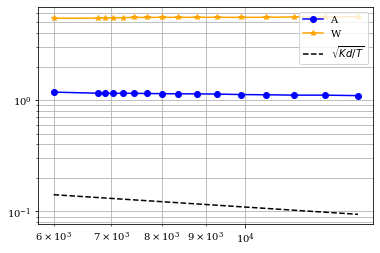

In [2]:
Ntrials = 6
block_num = 15

# initializing lists for errors
all_trials_A = np.zeros((Ntrials, block_num+1))
all_trials_W = np.zeros((Ntrials, block_num+1))

for trial in range(Ntrials):
    print('Trial Number:', trial)
    # generating labels and lengths of trajectories
    true_labels = np.random.randint(0, K, (M, 1))

    Ts = np.concatenate([np.ones((Msubspace, 1))*Tsubspace, np.ones((Mclustering,1))*Tclustering,
                         np.ones((Mclassification, 1))*Tclassification], axis=0)
    
    # generating synthetic data
    As, Whalfs = generate_models(d=d, K=K, rho=rho)

    # squaring Ws
    Ws = []
    for k in range(K):
        Ws.append(Whalfs[k]**2)
    
    # generating synthetic data
    Gammas, Ys = compute_autocovariance(As=As, Whalfs=Whalfs)
    delta_gy = compute_separation(Gammas=Gammas, Ys=Ys)
    data = generate_mixed_lds(As=As, Whalfs=Whalfs, true_labels=true_labels, Ts=Ts)
    
    data_subspace = data[:Msubspace]
    data_clustering = data[Msubspace:(Msubspace+Mclustering)]
    data_classification = data[(Msubspace+Mclustering):]

    print('Synthetic Data Generated')
    
    # coarse subspace estimation
    Vs, Us = subspace_estimation(data_sub_est=data_subspace, K=K)
    print('Coarse Subspace Estimated')
    
    # clustering
    labels_clustering, S_orig, S = clustering_fast(data=data_clustering, Vs=Vs, Us=Us, K=K, tau=delta_gy/4,
                                        no_subspace=0)
    print('Coarse Labels Clustered')

    print(labels_clustering)

    # getting the data corresponding to clusters
    clusters = get_clusters(data=data_clustering, labels=labels_clustering.squeeze(), K=K)
    
    # determine permutation
    subtl = true_labels[Msubspace:(Msubspace+Mclustering)]
    perm = np.zeros((K, 1)) # true label -> estimated label
    invperm = np.zeros((K, 1)) # estimated label -> true label
    visited = []
    for k in range(K):
        idx = (subtl == k)*1
        tmp = []
        for val in range(len(idx)):
            if idx[val] == 1:
                tmp.append(labels_clustering[val])
        tmpint = 0
        if(tmp and (round(np.median(tmp)) not in visited)):
            tmpint = round(np.median(tmp))
            visited.append(tmpint)
        else:
            print("Msub = ", Msubspace)
            raise NotImplementedError("Bad data")
        perm[k] = tmpint
        invperm[tmpint] = k

    start = time.time()
    # coarse model estimation
    listOfClusters = [clusters]
    for clusters in listOfClusters:
        print(clusters[0].shape)
    Ahats, Whats = model_estimation(listOfClusters)
    print('Coarse Models Estimated')

    # computing initial model errors
    A_error, W_error = model_errors(Ahats=Ahats, As=As, Whats=Whats, Ws=Ws, invperm=invperm)
    print('Initial A Error:', A_error)
    print('Initial W Error:', W_error)

    # initializing error lists
    errors_A = [A_error]
    errors_W = [W_error]

    # classification
    tmpidx = np.linspace(5, np.log(Mclassification), block_num).T
    tmpidx = np.ceil(np.exp(tmpidx))
    tmpidx[len(tmpidx)-1] = Mclassification
    tmpidx = np.insert(tmpidx, 0, 0)
    T_coarse = Tclustering * Mclustering
    T_refined = T_coarse + Tclassification * tmpidx

    
    # going through all block iterations
    for j in range(block_num):
        print("Block Iteration: ", j)
        idx1 = int(tmpidx[j])
        idx2 = int(tmpidx[j+1])

        newdata = data_classification[idx1:idx2] # data for classification

        # coarse model classification
        newlabels = classification(data_classification=newdata, Ahats=Ahats, Whats=Whats)
        newlabels = newlabels

        new_clusters = get_clusters(data=newdata, labels=newlabels.squeeze(), K=K)
        #print(len(new_clusters[0]), len(new_clusters[1]), len(new_clusters[2]), print(len(new_clusters[3])))
        
        # adding new clusters to data
        listOfClusters.append(new_clusters)
            
        # refining models
        refined_Ahats, refined_Whats = model_estimation(listOfClusters)
        refined_err_Ahats, refined_err_Whats = model_errors(Ahats=refined_Ahats, As=As,
                                                            Whats=refined_Whats, Ws=Ws, invperm=invperm)

        print("Refined A Error: ", refined_err_Ahats)
        print("Refined W Error: ", refined_err_Whats)

        # appending errors
        errors_A.append(refined_err_Ahats)
        errors_W.append(refined_err_Whats)
    
    end = time.time()
    print('Exec time is ', end-start)
    
    all_trials_A[trial, :] = np.asarray(errors_A)
    all_trials_W[trial, :] = np.asarray(errors_W)


A_errors_mean = np.mean(all_trials_A, axis=0)
W_errors_mean = np.mean(all_trials_W, axis=0)
scales = np.sqrt(K*d / T_refined)

plt.rc('font', family='serif')
plt.plot(T_refined, A_errors_mean.T, 'blue',marker='o')
plt.plot(T_refined, W_errors_mean.T, 'orange', marker='*')
plt.plot(T_refined, scales, 'black', linestyle='--')
plt.xscale("log")
plt.yscale("log")
plt.grid(True, 'both')
plt.legend(['A', 'W', '$\sqrt{Kd/T}$'])
plt.show()

np.savez('A_errors.npz', all_trials_A)
np.savez('W_errors.npz', all_trials_W)
np.savez('T_refined.npz', T_refined)

# Testing with vectorized model_estimation

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 19:12:03 2022

@author: soominkwon
"""

import numpy as np
import matplotlib.pyplot as plt

from utils import generate_models, compute_autocovariance, generate_mixed_lds, compute_separation
from classification import classification
from subspace_est import subspace_estimation
from clustering import clustering_fast
from model_estimation_vectorized import model_estimation
from helpers import get_clusters, model_errors
import time

# initializing parameters
d   = 30
K   = 4
rho = 0.5

Msubspace        = 30  * d
Mclustering      = 10 * d
Mclassification  = 50 * d
M = Msubspace + Mclustering + Mclassification

Tsubspace        = 20
Tclustering      = 20
Tclassification  = 5

In [4]:
Ntrials = 6
block_num = 15

# initializing lists for errors
all_trials_A = np.zeros((Ntrials, block_num+1))
all_trials_W = np.zeros((Ntrials, block_num+1))

for trial in range(Ntrials):
    print('Trial Number:', trial)
    # generating labels and lengths of trajectories
    true_labels = np.random.randint(0, K, (M, 1))

    Ts = np.concatenate([np.ones((Msubspace, 1))*Tsubspace, np.ones((Mclustering,1))*Tclustering,
                         np.ones((Mclassification, 1))*Tclassification], axis=0)
    
    # generating synthetic data
    As, Whalfs = generate_models(d=d, K=K, rho=rho)

    # squaring Ws
    Ws = []
    for k in range(K):
        Ws.append(Whalfs[k]**2)
    
    # generating synthetic data
    Gammas, Ys = compute_autocovariance(As=As, Whalfs=Whalfs)
    delta_gy = compute_separation(Gammas=Gammas, Ys=Ys)
    data = generate_mixed_lds(As=As, Whalfs=Whalfs, true_labels=true_labels, Ts=Ts)
    
    data_subspace = data[:Msubspace]
    data_clustering = data[Msubspace:(Msubspace+Mclustering)]
    data_classification = data[(Msubspace+Mclustering):]

    print('Synthetic Data Generated')
    
    # coarse subspace estimation
    Vs, Us = subspace_estimation(data_sub_est=data_subspace, K=K)
    print('Coarse Subspace Estimated')
    
    # clustering
    labels_clustering, S_orig, S = clustering_fast(data=data_clustering, Vs=Vs, Us=Us, K=K, tau=delta_gy/4,
                                        no_subspace=0)
    print('Coarse Labels Clustered')

    print(labels_clustering)

    # getting the data corresponding to clusters
    clusters = get_clusters(data=data_clustering, labels=labels_clustering.squeeze(), K=K)

    # determine permutation
    subtl = true_labels[Msubspace:(Msubspace+Mclustering)]
    perm = np.zeros((K, 1)) # true label -> estimated label
    invperm = np.zeros((K, 1)) # estimated label -> true label
    visited = []
    for k in range(K):
        idx = (subtl == k)*1
        tmp = []
        for val in range(len(idx)):
            if idx[val] == 1:
                tmp.append(labels_clustering[val])
        tmpint = 0
        if(tmp and (round(np.median(tmp)) not in visited)):
            tmpint = round(np.median(tmp))
            visited.append(tmpint)
        else:
            print("Msub = ", Msubspace)
            raise NotImplementedError("Bad data")
        perm[k] = tmpint
        invperm[tmpint] = k

    start = time.time()
    # coarse model estimation
    Ahats, Whats = model_estimation(clusters)
    print('Coarse Models Estimated')

    # computing initial model errors
    A_error, W_error = model_errors(Ahats=Ahats, As=As, Whats=Whats, Ws=Ws, invperm=invperm)
    print('Initial A Error:', A_error)
    print('Initial W Error:', W_error)

    # initializing error lists
    errors_A = [A_error]
    errors_W = [W_error]

    # classification
    tmpidx = np.linspace(5, np.log(Mclassification), block_num).T
    tmpidx = np.ceil(np.exp(tmpidx))
    tmpidx[len(tmpidx)-1] = Mclassification
    tmpidx = np.insert(tmpidx, 0, 0)
    T_coarse = Tclustering * Mclustering
    T_refined = T_coarse + Tclassification * tmpidx

    
    # going through all block iterations
    for j in range(block_num):
        print("Block Iteration: ", j)
        idx1 = int(tmpidx[j])
        idx2 = int(tmpidx[j+1])

        newdata = data_classification[idx1:idx2] # data for classification

        # coarse model classification
        newlabels = classification(data_classification=newdata, Ahats=Ahats, Whats=Whats)
        newlabels = newlabels

        new_clusters = get_clusters(data=newdata, labels=newlabels.squeeze(), K=K)
        #print(len(new_clusters[0]), len(new_clusters[1]), len(new_clusters[2]), print(len(new_clusters[3])))
        
        # adding new clusters to data
        for k in range(K):
            tmp = new_clusters[k]
            clusters[k] = clusters[k] + tmp
            
        # refining models
        refined_Ahats, refined_Whats = model_estimation(clusters)
        refined_err_Ahats, refined_err_Whats = model_errors(Ahats=refined_Ahats, As=As,
                                                            Whats=refined_Whats, Ws=Ws, invperm=invperm)

        print("Refined A Error: ", refined_err_Ahats)
        print("Refined W Error: ", refined_err_Whats)

        # appending errors
        errors_A.append(refined_err_Ahats)
        errors_W.append(refined_err_Whats)
    
    end = time.time()
    print('Exec time is ', end-start)
    
    all_trials_A[trial, :] = np.asarray(errors_A)
    all_trials_W[trial, :] = np.asarray(errors_W)


A_errors_mean = np.mean(all_trials_A, axis=0)
W_errors_mean = np.mean(all_trials_W, axis=0)
scales = np.sqrt(K*d / T_refined)

plt.rc('font', family='serif')
plt.plot(T_refined, A_errors_mean.T, 'blue',marker='o')
plt.plot(T_refined, W_errors_mean.T, 'orange', marker='*')
plt.plot(T_refined, scales, 'black', linestyle='--')
plt.xscale("log")
plt.yscale("log")
plt.grid(True, 'both')
plt.legend(['A', 'W', '$\sqrt{Kd/T}$'])
plt.show()

np.savez('A_errors.npz', all_trials_A)
np.savez('W_errors.npz', all_trials_W)
np.savez('T_refined.npz', T_refined)

Trial Number: 0
Synthetic Data Generated
Coarse Subspace Estimated
Coarse Labels Clustered
[[0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [3]
 [1]
 [3]
 [1]
 [3]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [3]
 [3]
 [2]
 [0]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]
 [3]
 [3]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [3]
 [0]
 [3]
 [0]
 [3]
 [0]
 [2]
 [3]
 [1]
 [0]
 [3]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [3]
 [0]
 [0]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [2]
 [1]
 [0]
 [3]
 [3]
 [1]
 [1]
 [1]
 [2]
 [2]
 [3]
 [0]
 [2]
 [3]
 [3]
 [1]
 [1]
 [3]
 [0]
 [3]
 [2]
 [0]
 [2]
 [1]
 [1]
 [3]
 [3]
 [2]
 [1]
 [0]
 [3]
 [0]
 [0]
 [1]
 [3]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [3]
 [3]
 [2]
 [0]
 [2]
 [1]
 [2]
 [3]
 [1]
 [3]
 [3]
 [0]
 [2]
 [2]
 [3]
 [2]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [2]
 [2]
 [1]
 [2]
 [3]
 [3]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [3]
 [2]
 [2]
 [2]
 [3]
 [2]
 [3]
 [3]
 [3]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [3]
 [0]
 [2]
 [1]

ValueError: operands could not be broadcast together with shapes (80,30,21) (43,30,6) 